In [1]:
import tensorflow as tf
from tensorflow import keras
from input_data import Dataset
import numpy as np
import matplotlib.pyplot as plt

# Load Dataset

In [2]:
Data = Dataset('cora', seed=15)

# Vanilla SGC

## Train and test

In [3]:
tf.random.set_seed(42)
SGC = keras.Sequential([keras.layers.Dense(units=Data.n_classes, kernel_regularizer=keras.regularizers.l2(1e-5), activation='softmax')])
SGC.compile(optimizer=keras.optimizers.Adam(0.01), 
                loss=keras.losses.sparse_categorical_crossentropy,
                metrics=['accuracy'])

early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                min_delta=1e-3,
                                                patience=5,
                                                mode='max',
                                              )
history = SGC.fit(x=Data.train_feat, 
                    y=Data.y_train, 
                    epochs=100, 
                    verbose=None,
                    validation_data=(Data.val_feat, Data.y_val),
                    shuffle=True,
                    batch_size=128,
                    callbacks=[early_stopping],
    )
loss, acc = SGC.evaluate(
            x=Data.test_feat, 
            y=Data.y_test, 
            verbose=None,
            batch_size=128
            )
print(f'Converged after {history.epoch[-1]} iterations, accuracy {acc*100:.2f}%')

Converged after 16 iterations, accuracy 84.96%


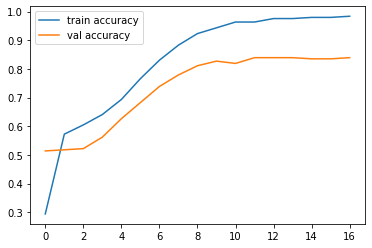

In [4]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train accuracy', 'val accuracy'])

# SGC with label smoothing

## Convert to one hot

In [5]:
one_hot = np.eye(Data.n_classes)
y_train = one_hot[Data.y_train]

# label smoothing
confidence = 0.2
y_train =  (1. - confidence)*y_train + confidence / Data.n_classes

y_val = one_hot[Data.y_val]
y_test = one_hot[Data.y_test]

## Train and test

In [6]:
tf.random.set_seed(42)
SGC = keras.Sequential([keras.layers.Dense(units=Data.n_classes, kernel_regularizer=keras.regularizers.l2(1e-5), activation='softmax')])
SGC.compile(optimizer=keras.optimizers.Adam(0.01), 
                loss=keras.losses.categorical_crossentropy,
                metrics=['accuracy'])

early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                min_delta=1e-3,
                                                patience=5,
                                                mode='max',
                                              )
history = SGC.fit(x=Data.train_feat, 
                    y=y_train, 
                    epochs=100, 
                    verbose=None,
                    validation_data=(Data.val_feat, y_val),
                    shuffle=True,
                    batch_size=128,
                    callbacks=[early_stopping],
    )
loss, acc = SGC.evaluate(
            x=Data.test_feat, 
            y=y_test, 
            verbose=None,
            batch_size=128
            )
print(f'Converged after {history.epoch[-1]} iterations, accuracy {acc*100:.2f}%')

Converged after 14 iterations, accuracy 85.11%


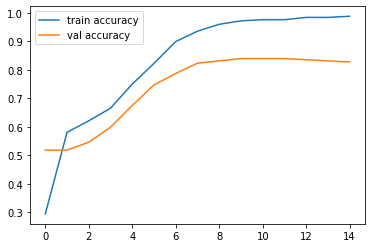

In [7]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train accuracy', 'val accuracy'])